*texto en cursiva*# Análisis de Fallas
## Notebook: [**Histórico de Fallas 2024**](https://sites.google.com/unal.edu.co/inv-educativa-aula-ing-2024-1/)


---------------

Los ítems que se desarrollarán son los siguientes:
1. Análisis exploratorio
2. Análisis de correlaciones
3. Análisis ANOVA
4. Análisis t-test
5. Análisis tamano de efecto


  

# 0. Entendimiento de los datos

### 0.1. Librerías

Además del lenguaje de programación Python, para el análisis cuantitativo vamos a utilizar las siguientes librerías:

In [2]:
import numpy as np    # Librería numérica de Python (es la base de Pandas)
import pandas as pd   # Librería de análisis y manipulación de datos
import matplotlib.pyplot as plt   # Librería básica de visualización de Python
%matplotlib inline
import seaborn as sns  # Librería para visualización de datos estadísticos

### 0.2. Adquisición y carga de datos

In [3]:
!ls #Comando UNIX para listar los archivos en el directorio (desde Colab se usa "!" antes de los comandos UNIX)

Fallas.xlsx  sample_data


In [1]:
!pwd # Comando UNIX para conocer el directorio actual donde estamos ubicados en el sistema de archivos

/content


#### Excel

Pandas puede leer y escribir archivos de Excel. Tenga en cuenta que sólo se importan los valores, no se importan fórmulas o imágenes. Es posible que el método read_excel de Pandas falle si la hoja de Excel tiene macros o imágenes.

**IMPORTANTE:** Antes de ejecutar la siguiente celda, debe cargar el archivo **'Datos - Taller análisis cuantitativos.xlsx'** en el sistema de archivos de Colab. Este archivo contiene la muestra con la cual se realizarán los análisis a partir de los datos recolectados.

In [4]:
datos = pd.read_excel('Fallas.xlsx',
                      sheet_name='Historico') #Seleccionamos la hoja que nos interesa (el archivo tiene 2 hojas)
datos

,ID_FALLA,FECHA,Hora falla,Circuito en falla,Elemento que opera,Diferida,Carga,Causa,LATITUD,LONGITUD,TIPO DE FAUNA,TIPO DE COMPONENTE,FASE A,FASE B,FASE C,FASE G,PROTECCIÓN
0,2024_GDA_001,2024-01-09,13:31:00,P3,P3RC04,10.63,0.80,No Identificada,4.060504,-73.478624,NaN,NaN,1527,67,67,1519.0,50-AG
1,2024_GDA_002,2024-01-15,07:43:00,Suria,SURIA,114.79,8.30,Fauna,4.065215,-73.387431,Ave (Cotujo),NaN,449,2056,299,1361.0,50-BG
2,2024_GDA_003,2024-01-25,13:07:00,P4,P3/P4,588.87,18.48,Falla Componente,4.043396,-73.439680,NaN,Cable - Puente,5461,6475,5711,6707.0,51-ABCG
3,2024_GDA_004,2024-02-02,07:36:00,P2,P2RC09,17.52,3.10,No Identificada,4.085524,-73.372130,NaN,NaN,20,1837,22,1842.0,50-BG
4,2024_GDA_005,2024-02-04,08:22:00,P4,P4RC13,15.33,1.40,Fauna,4.040655,-73.459302,Ave (Jirigüelo),NaN,80,2256,69,2245.0,50-BG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2024_GDA_076,2024-08-03,21:36:00,Suria,Cortacircuito,49.01,0.17,Falla Componente,NaN,NaN,NaN,Cortacircuito,501,9,9,498.0,50-AG
76,2024_GDA_077,2024-08-03,23:16:00,P3,RC-ALEDAÑO P3RC18,5.69,0.43,Fauna,NaN,NaN,Serpiente,NaN,62,1320,68,1315.0,50-BG
77,2024_GDA_078,2024-08-04,21:04:00,P1,P1-PPAL,389.32,9.43,Fauna,NaN,NaN,Zarigüeya,NaN,100,2210,1970,NaN,50-BC
78,2024_GDA_079,2024-08-06,19:45:00,EBA,EBA-SU28,0.00,1.10,No Identificada,NaN,NaN,NaN,NaN,1803,69,38,1833.0,50-AG


## 1. Análisis exploratorio de datos

El análisis exploratorio de datos es una actividad realizada cuando se entra en contacto con datos nuevos. Permite hacer una aproximación inicial a las características generales que se pueden identificar en los datos. Se suele apoyar de actividades como:
1. La descripción y resumen de los datos por medio de estadística descriptiva.
2. Visualización de datos.


### 1.1. Descipción y resumen de los datos

En esta sección podemos evidenciar a partir de las funciones, la cantidad de datos para cada una de las variables y el tipo de dato correspondiente. A partir de los resultados, se puede observar que existen varibales con bastantes datos faltantes, como es el caso de tipo de fauna y datos relacionados con latitud y lingitud, es decir, la ubicación.

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID_FALLA            80 non-null     object        
 1   FECHA               80 non-null     datetime64[ns]
 2   Hora falla          80 non-null     object        
 3   Circuito en falla   80 non-null     object        
 4   Elemento que opera  80 non-null     object        
 5   Diferida            80 non-null     float64       
 6   Carga               79 non-null     float64       
 7   Causa               80 non-null     object        
 8   LATITUD             71 non-null     float64       
 9   LONGITUD            71 non-null     float64       
 10  TIPO DE FAUNA       38 non-null     object        
 11  TIPO DE COMPONENTE  16 non-null     object        
 12  FALLA A             80 non-null     int64         
 13  FALLA B             80 non-null     int64         
 

### 1.2. Variables de interés
Respecto a nuestra varible de interés, la cual es la columna "Diferida" con la cual se representa la pérdida de producción (en barriles de petróleo) debido a fallas eléctrica para este caso, podemos notar que la mayor pérdida fue de 1833.82 BBL.

In [ ]:
datos['Diferida'].nlargest(10)

,Diferida
37,1833.82
22,1115.58
2,588.87
33,573.96
13,480.65
42,446.49
19,416.45
77,389.32
62,332.98
12,295.27


Por otra parte, 12 estudiantes obtuvieron notas inferiores a 1.0, lo cual representa el 6.7% del total de datos obtenidos en la variable.

In [ ]:
datos['Diferida'].nsmallest(10)

,Diferida
17,0.00
18,0.00
48,0.00
78,0.00
73,0.88
8,1.63
53,2.79
76,5.69
61,6.68
28,7.83


In [ ]:
datos['Diferida'].idxmax()

37

In [ ]:
datos['Diferida'].idxmin()

17

Resumen mediante estadística descriptiva:

In [ ]:
datos['Diferida'].describe()

,Diferida
count,80.000000
mean,141.932750
std,259.085873
min,0.000000
25%,15.862500
50%,55.205000
75%,147.690000
max,1833.820000


In [ ]:
datos[['FALLA A','FALLA B','FALLA C','FALLA G']].mean()

,0
FALLA A,981.150000
FALLA B,1506.725000
FALLA C,964.337500
FALLA G,1827.139241


In [ ]:
falla_desviacion_up = datos.loc[(datos['FALLA A'] > 2000), :]
falla_desviacion_up

,ID_FALLA,FECHA,Hora falla,Circuito en falla,Elemento que opera,Diferida,Carga,Causa,LATITUD,LONGITUD,TIPO DE FAUNA,TIPO DE COMPONENTE,FALLA A,FALLA B,FALLA C,FALLA G,PROTECCIÓN
2,2024_GDA_003,2024-01-25,13:07:00,P4,P3/P4,588.87,18.48,Falla Componente,4.043396,-73.439680,NaN,Cable - Puente,5461,6475,5711,6707.0,51-ABCG
10,2024_GDA_011,2024-02-10,01:17:00,P5,P5RC15,178.52,5.52,Fauna,4.025840,-73.446866,Sin evidencia,NaN,2538,50,59,2545.0,50-AG
20,2024_GDA_021,2024-03-08,03:03:00,P3/P4,P3/P4,173.40,7.00,Fauna,4.043370,-73.439692,Zarigüeya,NaN,3777,4778,3654,4918.0,51-ABCG
22,2024_GDA_023,2024-03-13,09:16:00,Externa,TES,1115.58,19.20,Falla termica,NaN,NaN,NaN,NaN,2082,70,41,2116.0,50-AG
24,2024_GDA_025,2024-03-17,06:15:00,P5,P5-PPAL,249.43,10.14,No Identificada,4.037112,-73.441267,NaN,NaN,2707,2354,10,3013.0,50-ABG
31,2024_GDA_032,2024-04-05,08:15:00,P5,P5RC09,190.75,5.80,Fauna,4.026571,-73.449891,Ave (Garrapatero),NaN,2574,2506,336,2582.0,50-AG
32,2024_GDA_033,2024-04-05,22:03:00,P5,P5-PPAL,61.48,6.10,Fauna,4.027678,-73.440396,murciélago,NaN,2623,238,287,2746.0,50-AG
33,2024_GDA_034,2024-04-18,12:36:00,P4,P4-PPAL,573.96,13.25,Descarga Atmosférica,4.033700,-73.440800,NaN,CABLE GUARDA,4362,162,4930,3778.0,50-ACG
38,2024_GDA_039,2024-05-06,23:21:00,EBA,EBA-SU28,8.22,2.30,Falla Componente,4.071465,-73.426392,NaN,aislador Tipo Pin,2139,1957,39,1310.0,50-ABG
41,2024_GDA_042,2024-05-10,19:51:00,Externa,EBA-SU28,124.71,4.90,Fauna,4.086585,-73.379697,Zarigüeya,NaN,2030,2112,2025,2.0,50-ABC


<ipython-input-22-76b7964b48db>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(falla_desviacion_up, x='Diferida', y='TIPO DE FAUNA', inner='stick', palette='Dark2')


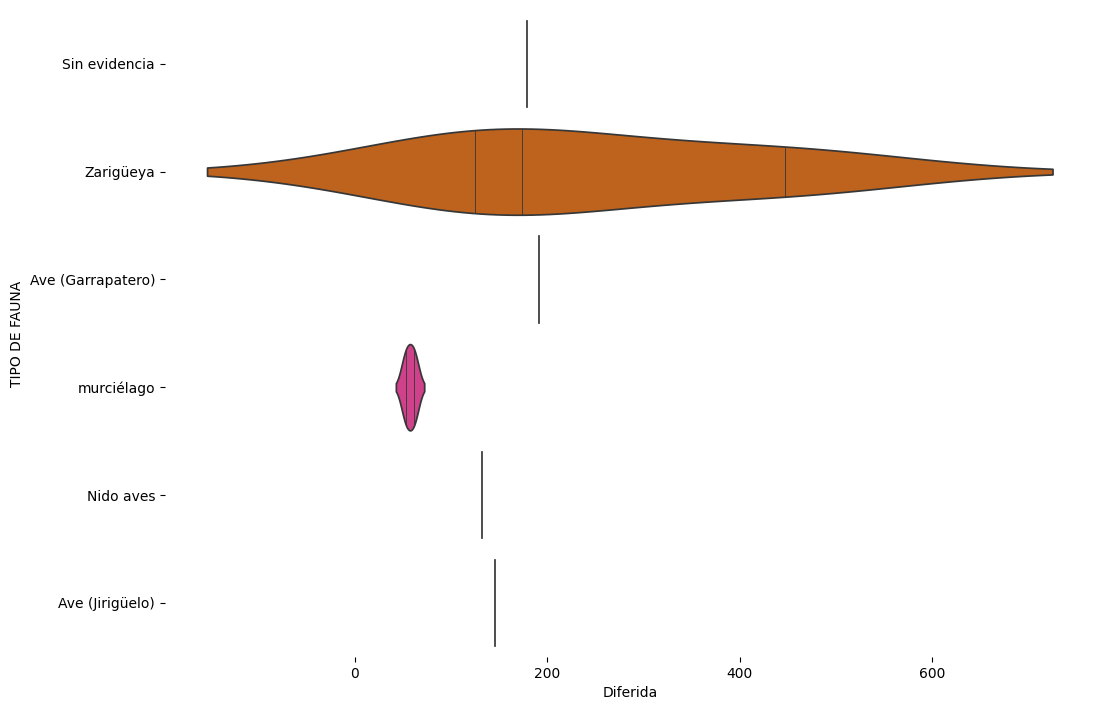

In [ ]:
# @title TIPO DE FAUNA vs Diferida

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(falla_desviacion_up['TIPO DE FAUNA'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(falla_desviacion_up, x='Diferida', y='TIPO DE FAUNA', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-21-351f17d4522a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(falla_desviacion_up, x='Diferida', y='Causa', inner='stick', palette='Dark2')


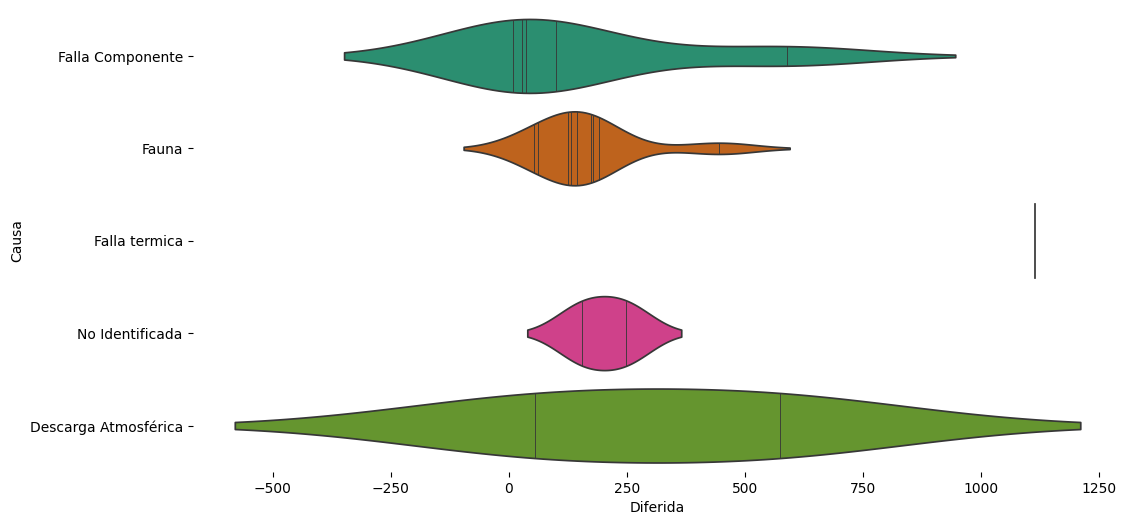

In [ ]:
# @title Causa vs Diferida

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(falla_desviacion_up['Causa'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(falla_desviacion_up, x='Diferida', y='Causa', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
datos['Circuito en falla'].value_counts()

,count
Circuito en falla,
P1,20
P3,19
P5,11
P4,7
Externa,7
P2,5
EBA,5
Suria,4
CDS,1


In [ ]:
datos['Causa'].value_counts()

,count
Causa,
Fauna,38
No Identificada,14
Falla Componente,14
Flora,8
Descarga Atmosférica,3
Error Humano,2
Falla termica,1


In [ ]:
datos['PROTECCIÓN'].value_counts()

,count
PROTECCIÓN,
50-BG,24
50-AG,15
50-CG,14
50-ABG,7
50-BCG,5
50-ABC,5
51-ABCG,2
50-ABCG,2
50BF,1


In [ ]:
datos['TIPO DE FAUNA'].value_counts()

,count
TIPO DE FAUNA,
Zarigüeya,7
Serpiente,6
chulo,6
murciélago,4
Ave (Jirigüelo),3
Sin evidencia,3
Nido aves,3
Tucan,2
Ave (Cotujo),1


In [ ]:
datos['TIPO DE COMPONENTE'].value_counts()

,count
TIPO DE COMPONENTE,
Aislador Line post,5
Cortacircuito,2
CABLE GUARDA,2
Cable - Puente,1
Puente,1
Capuchon,1
aislador Tipo Pin,1
Cable ASCR,1
SDTH,1


### 1.3. Visualización de datos

#### Usando Pandas

**Histogramas**

Gráfica de una variable continua en forma de barras, donde la superficie de cada barra es proporcional a la frecuencia de los valores representados. Sirven para explorar la distribución de los datos.

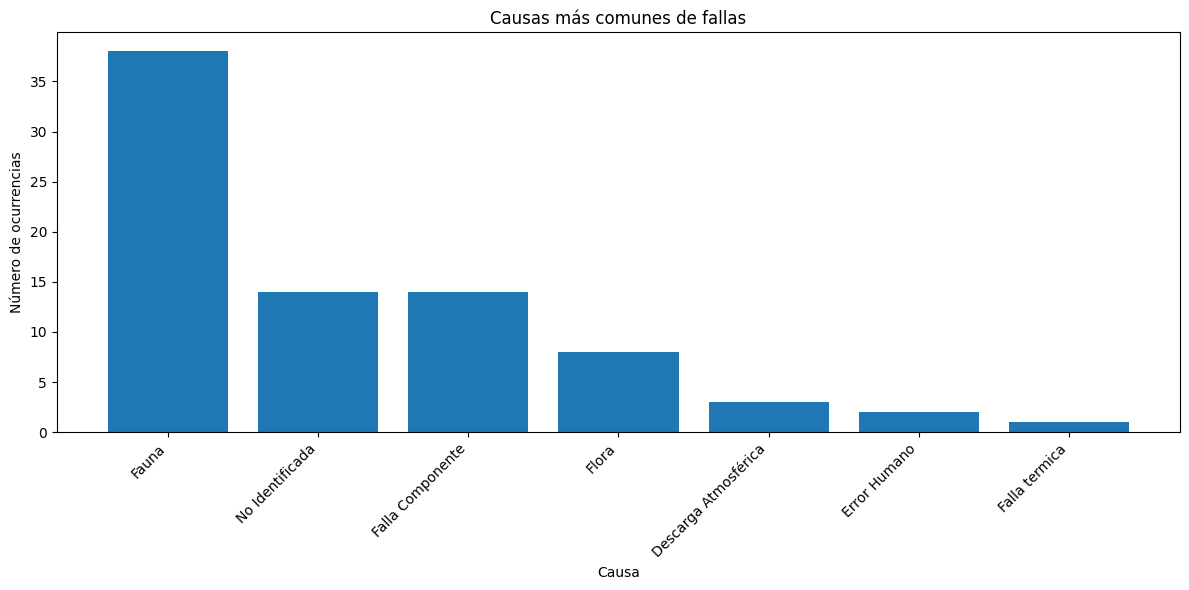

In [ ]:

import matplotlib.pyplot as plt


# Agrupar los datos por la columna 'Causa' y contar las ocurrencias
cause_counts = datos['Causa'].value_counts()

# Crear el histograma basado en los datos
plt.figure(figsize=(12, 6))
plt.bar(cause_counts.index, cause_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title('Causas más comunes de fallas')
plt.xlabel('Causa')
plt.ylabel('Número de ocurrencias')
plt.tight_layout()
plt.show()


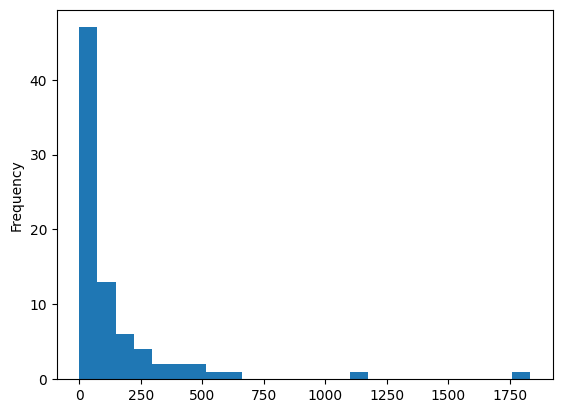

In [ ]:
datos['Diferida'].plot.hist(bins = 25); # Número fijo de intervalos de clase (bins)

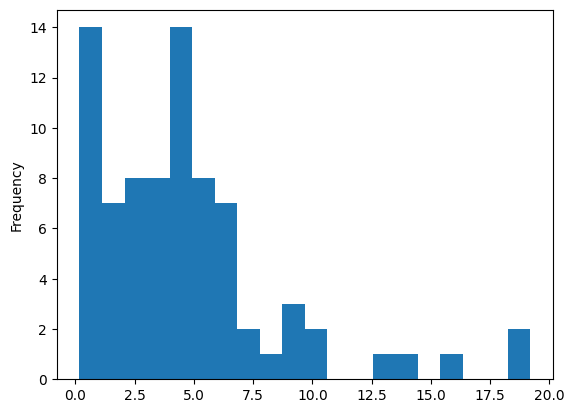

In [ ]:
datos['Carga'].plot.hist(bins = 20); # Número fijo de intervalos de clase (bins)

**Diagrama de dispersión (scatter)**

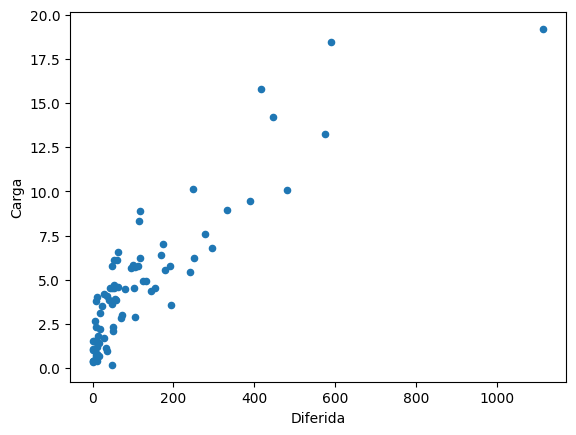

In [ ]:
datos.plot(kind='scatter', x='Diferida', y='Carga');

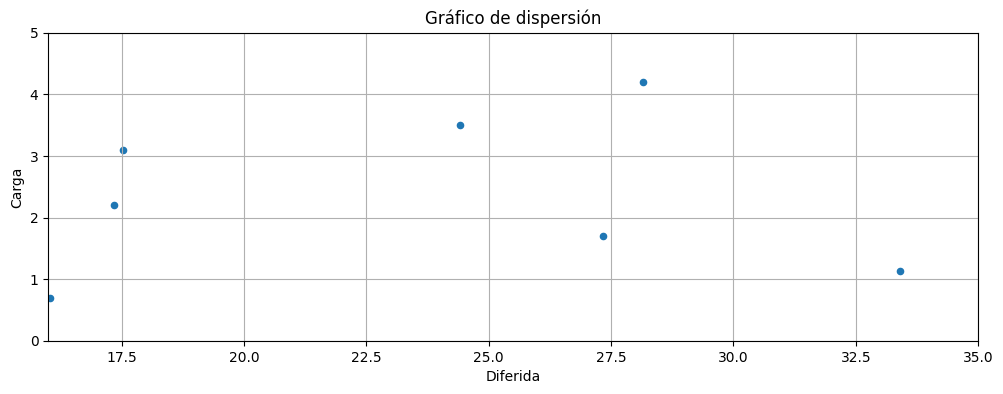

In [ ]:
fig = datos.plot(kind='scatter', x='Diferida', y='Carga',
        xlim=(16,35), ylim=(0,5), grid=True,
        title="Gráfico de dispersión", figsize=(12,4));

**Gráfico de cajas (BoxPlot)**

<Axes: >

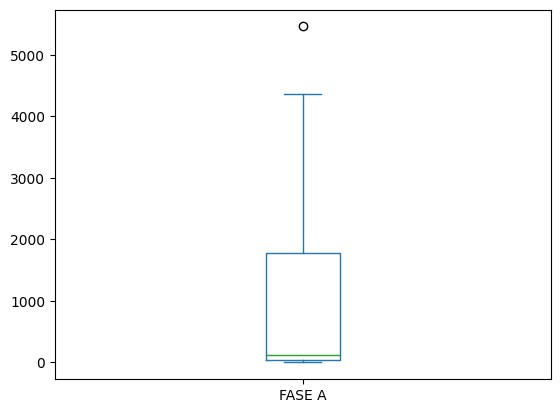

In [ ]:
datos['FASE A'].plot.box()

Existen valores atípicos máximos bastante dispersos respecto a Hora_trabajo_extraclase por encima de 15 horas

<Axes: >

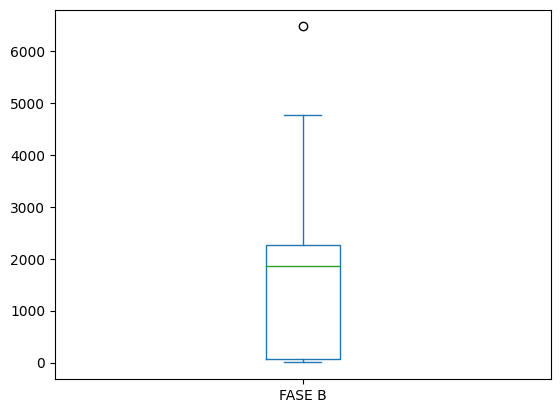

In [ ]:
datos['FASE B'].plot.box()

<Axes: >

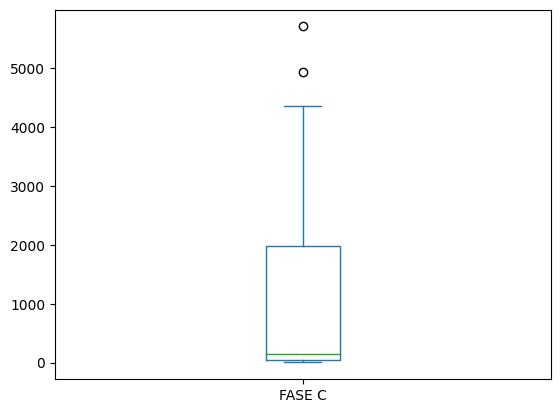

In [ ]:
datos['FASE C'].plot.box()

<Axes: >

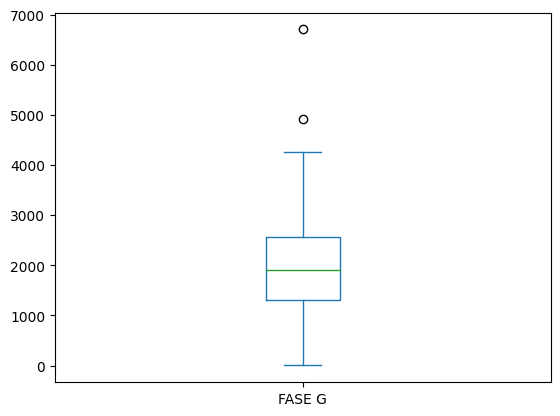

In [ ]:
datos['FASE G'].plot.box()

**Group by**

In [ ]:
datos[['Causa','FASE A','FASE B','FASE C','FASE G','Diferida']].groupby('Causa').mean()

,FASE A,FASE B,FASE C,FASE G,Diferida
Causa,,,,,
Descarga Atmosférica,2185.666667,717.333333,2292.333333,1295.333333,821.410000
Error Humano,33.500000,9.000000,1373.000000,1403.500000,252.535000
Falla Componente,1353.214286,1787.285714,1140.071429,2484.428571,89.875714
Falla termica,2082.000000,70.000000,41.000000,2116.000000,1115.580000
Fauna,901.026316,1805.105263,897.921053,1820.243243,120.740789
Flora,673.500000,1119.125000,1545.000000,957.500000,88.427500
No Identificada,801.000000,1123.500000,360.071429,1838.857143,51.136429


**Gráfico de barras**

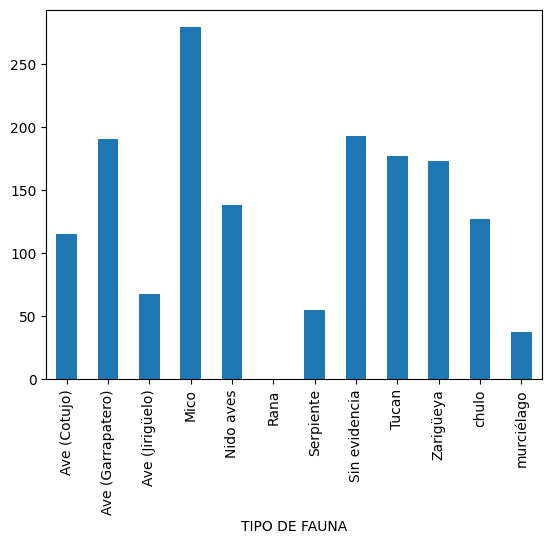

In [ ]:
datos[['TIPO DE FAUNA','Diferida']].groupby('TIPO DE FAUNA').mean()['Diferida'].plot.bar();

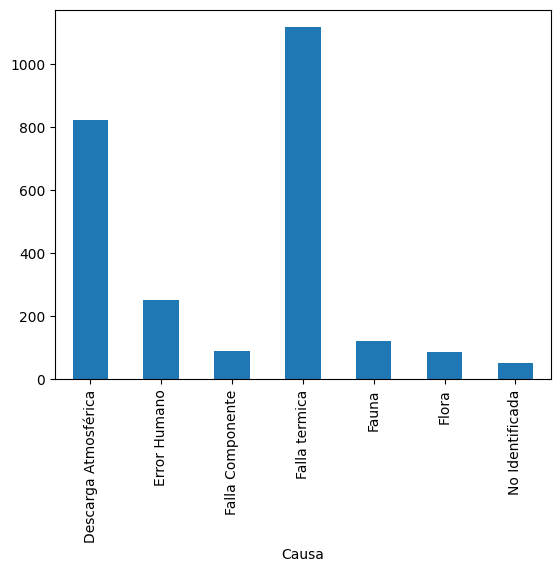

In [ ]:
datos[['Causa','Diferida']].groupby('Causa').mean()['Diferida'].plot.bar();

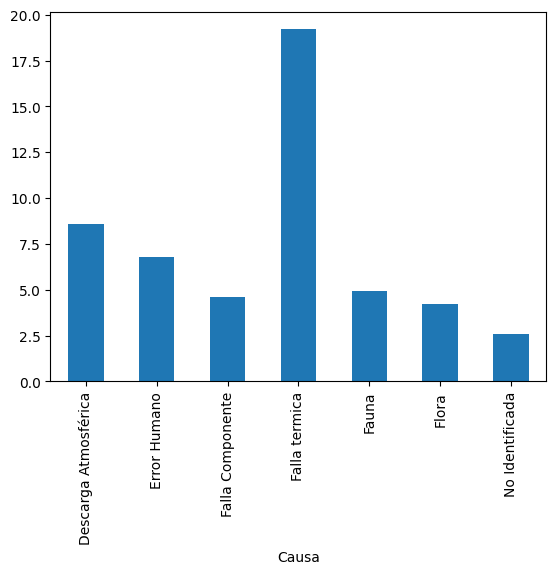

In [5]:
datos[['Causa','Carga']].groupby('Causa').mean()['Carga'].plot.bar();

#### Usando Seaborn

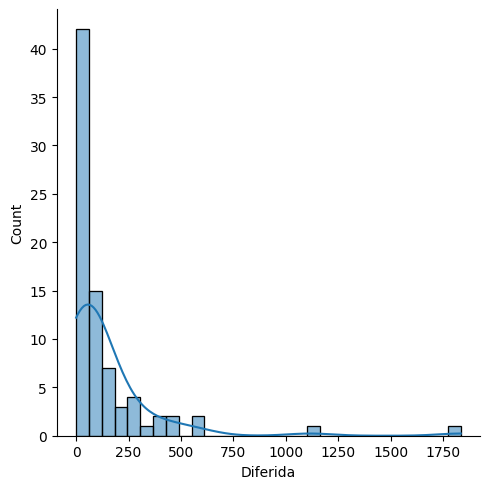

In [ ]:
sns.displot(datos['Diferida'], kde=True)

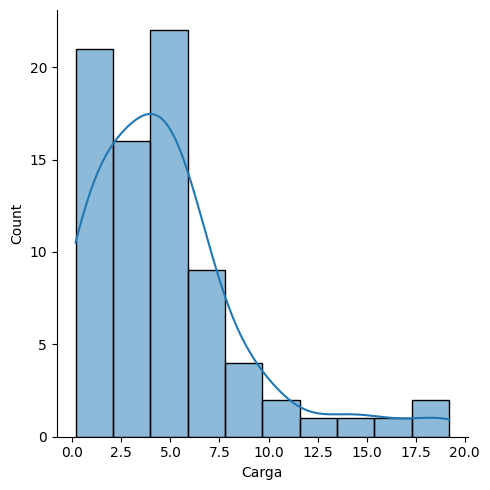

In [6]:
sns.displot(datos['Carga'], kde=True)

Lo promedios académicos bajos no siempre obtienen malas notas finales, son embargo, la mayoría de estudiantes con promedios altos, se encuentras con notas definitivas por encima de la media.

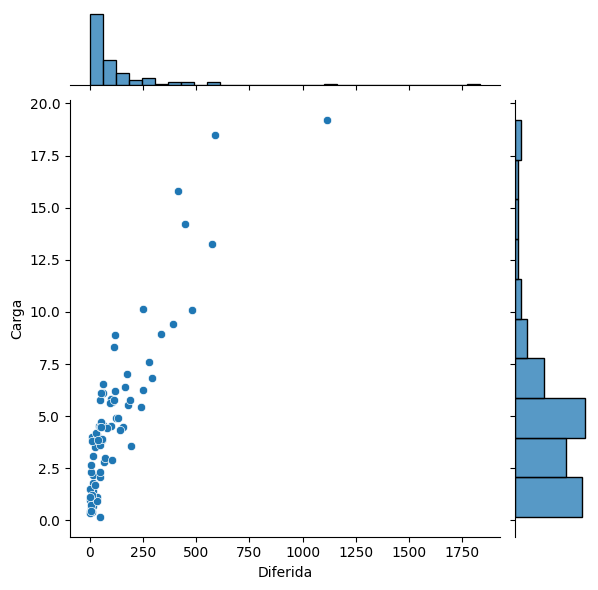

In [ ]:
sns.jointplot(x='Diferida', y='Carga', data=datos)   #se define la columna a diagramar en cada uno de los dos ejes, y el dataset correspondiente

Los estudiantes con promedios entre 3.2 y y 3.7 obtuvieron notas definitivas cercanas o por encima de la media, es decir, notas con valores entre 3.0 y 4.0.

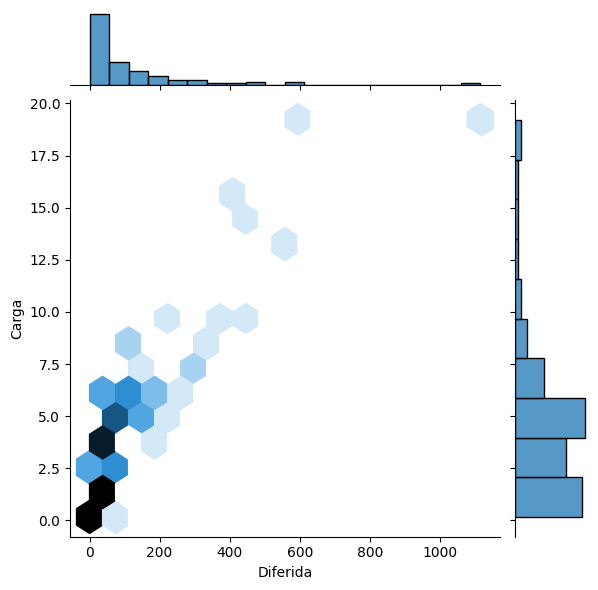

In [7]:
sns.jointplot(x='Diferida', y='Carga', data=datos, kind='hex')
# Se representa la relación con hexagonos, a mayor densidad de puntos, más oscuro se presenta el hexágono correspondiente

Podemos adicionar un objeto "colorBar" usando matplotlib:

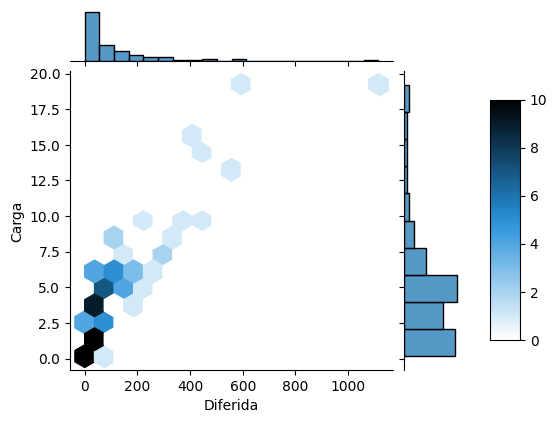

In [8]:
hexplot = sns.jointplot(x='Diferida', y='Carga', data=datos, kind="hex")
plt.subplots_adjust(left=0.15, right=0.8, top=0.8, bottom=0.2)  # reducimos el tamaño de la figura original para darle espacio al colorBar
# Constriumos un nuevo "axe" para el colorBar
cbar_ax = hexplot.fig.add_axes([.85, .25, .05, .4])  # x, y, ancho, alto
plt.colorbar(cax=cbar_ax)
plt.show()

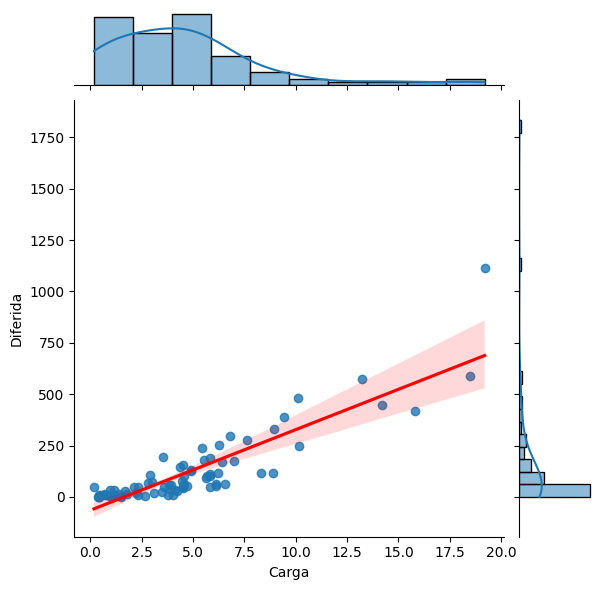

In [10]:
sns.jointplot(x='Carga', y='Diferida', data=datos, kind='reg', joint_kws={'line_kws':{'color':'r'}})
# Es básicamente el diagrama de tipo scatter, pero se incluye la linea de regresión lineal

El método `pairplot` permite explorar un conjunto de datos con facilidad al representar diagramas de dispersión para todas las combinaciones entre las variables numéricas e histogramas para cada variable numérica, así:

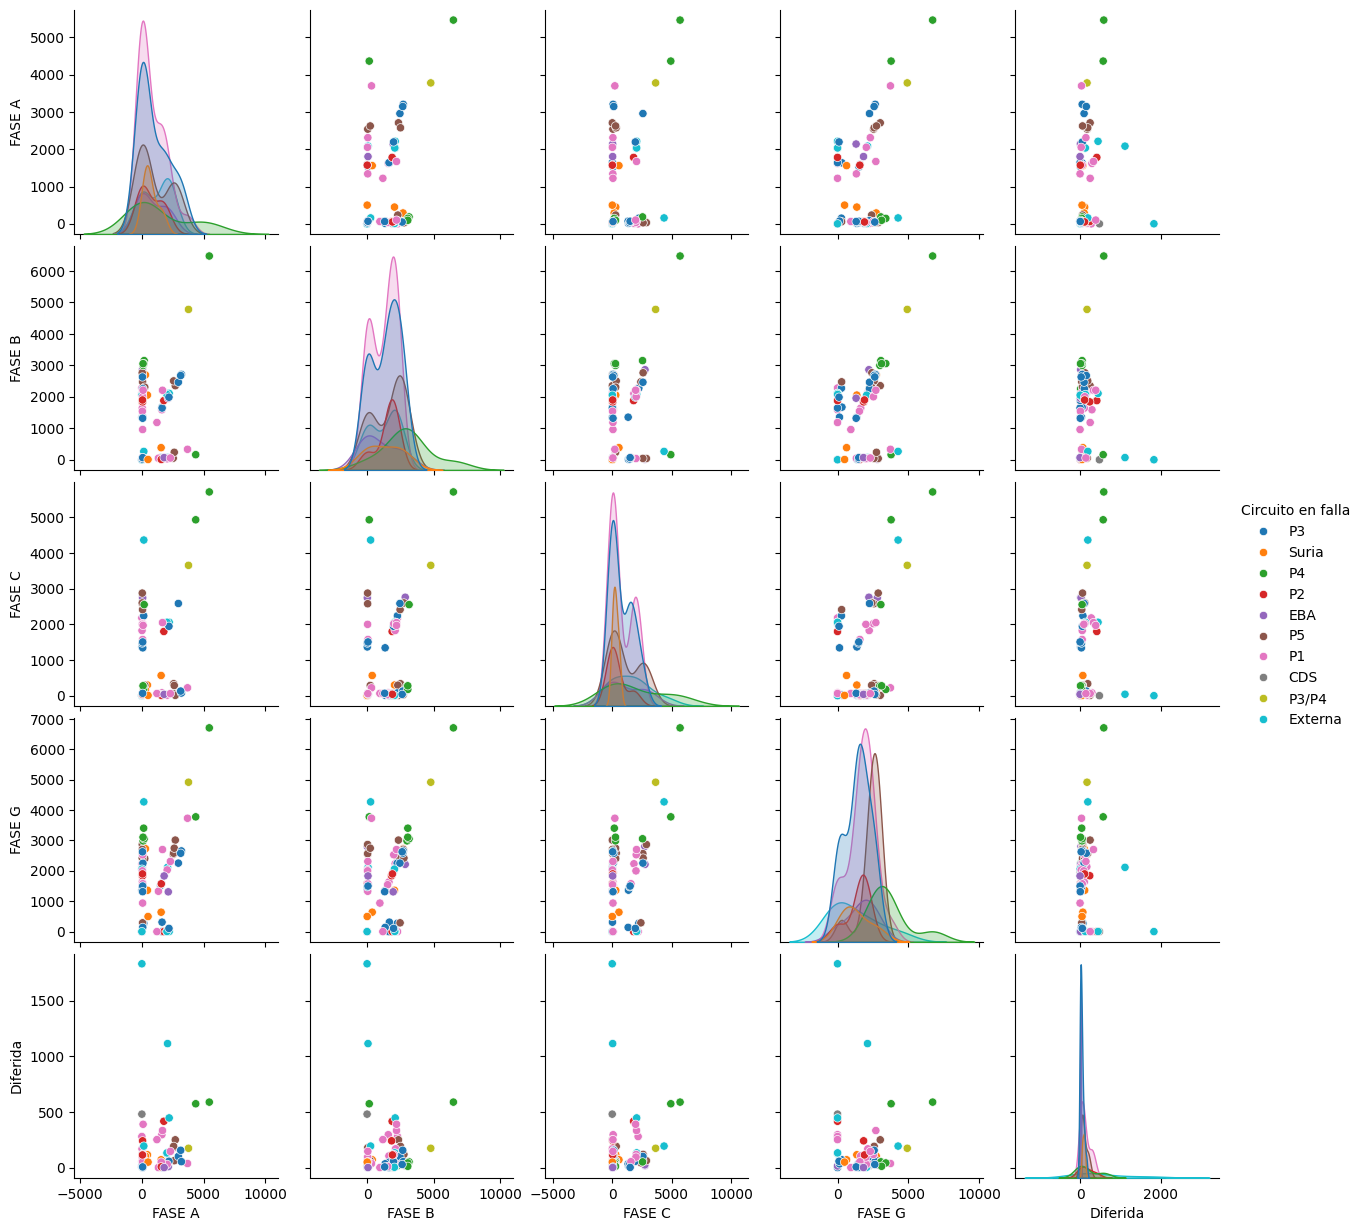

In [13]:
sns.pairplot(datos[['FASE A', 'FASE B', 'FASE C', 'FASE G', 'Diferida', 'Causa',  'Circuito en falla']],
       hue='Circuito en falla')
# El parámetro hue define un tono de color para cada dato de acuerdo a una variable categórica
# Si queremos usar histogramas en la diagonal, usar el parámetro: diag_kind='hist'

Text(0, 0.5, 'Diferida')

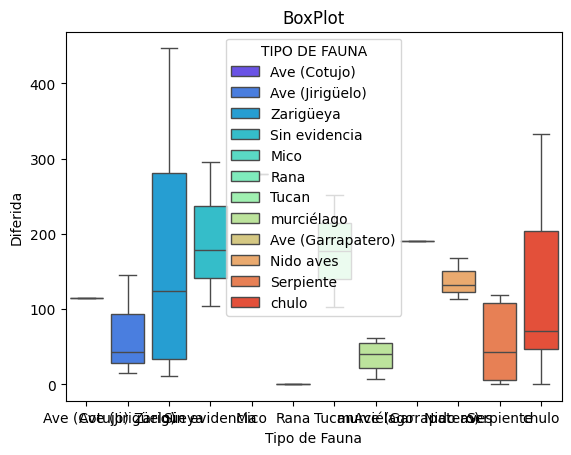

In [18]:
ax = sns.boxplot(x="TIPO DE FAUNA", y="Diferida", data=datos,
                 palette='rainbow', hue="TIPO DE FAUNA")
ax.set_title("BoxPlot")
ax.set_xlabel("Tipo de Fauna")
ax.set_ylabel("Diferida")

Text(0, 0.5, 'Carga')

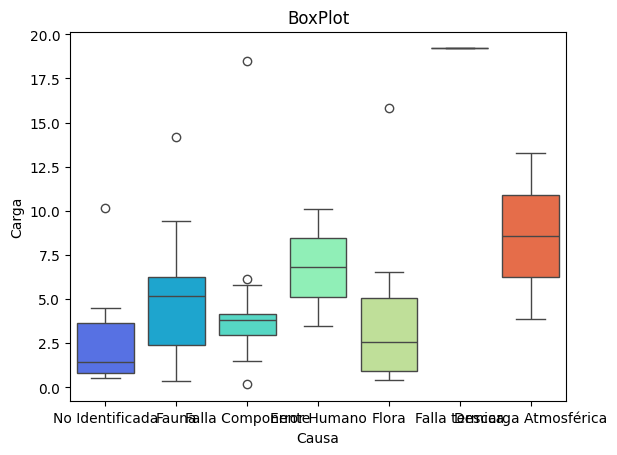

In [17]:
ax = sns.boxplot(x="Causa", y="Carga", data=datos,
                 palette='rainbow', hue="Causa")
ax.set_title("BoxPlot")
ax.set_xlabel("Causa")
ax.set_ylabel("Carga")

Text(0, 0.5, 'Diferida')

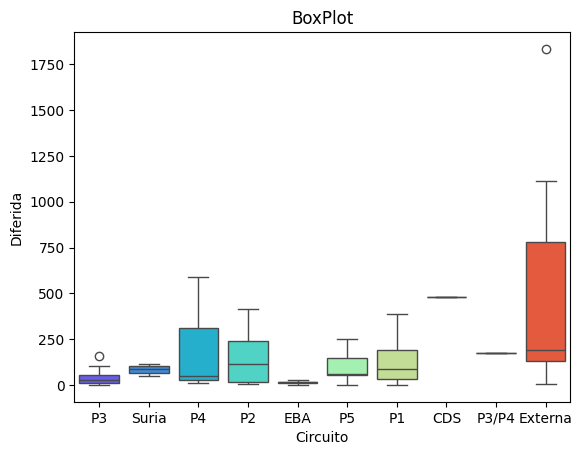

In [15]:
ax = sns.boxplot(x="Circuito en falla", y="Diferida", data=datos,
                 palette='rainbow', hue="Circuito en falla")
ax.set_title("BoxPlot")
ax.set_xlabel("Circuito")
ax.set_ylabel("Diferida")

# 2 Análisis de correlaciones

In [26]:
datos[[  'Diferida', 'Carga', 'FASE A', 'FASE B', 'FASE C', 'FASE G']].corr()  #Retorna la matrix de correlaciones para pares de columnas con valor numérico
# Por defecto: Pearson

,Diferida,Carga,FASE A,FASE B,FASE C,FASE G
Diferida,1.000000,0.881623,0.199666,-0.028211,0.136788,-0.041879
Carga,0.881623,1.000000,0.447331,0.263704,0.396561,0.230510
FASE A,0.199666,0.447331,1.000000,0.168217,0.236619,0.316215
FASE B,-0.028211,0.263704,0.168217,1.000000,0.251654,0.370852
FASE C,0.136788,0.396561,0.236619,0.251654,1.000000,0.358826
FASE G,-0.041879,0.230510,0.316215,0.370852,0.358826,1.000000


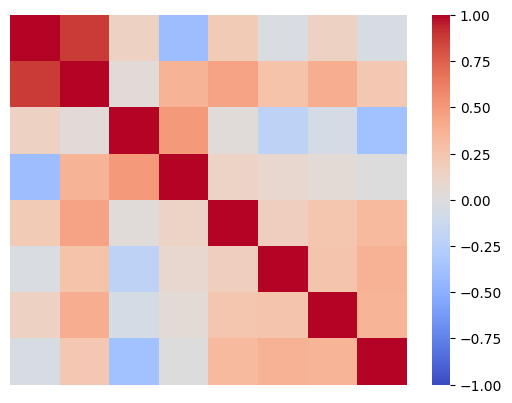

In [27]:
# Mapa de calor con la matriz de correlación anterior (más adelante mejoraremos esta visualización notablemente)
mapa_calor = sns.heatmap(datos.corr(numeric_only=True), cmap='coolwarm', vmin=-1, vmax=1,
                         xticklabels=False, yticklabels=False)

#### Matriz de correlaciones

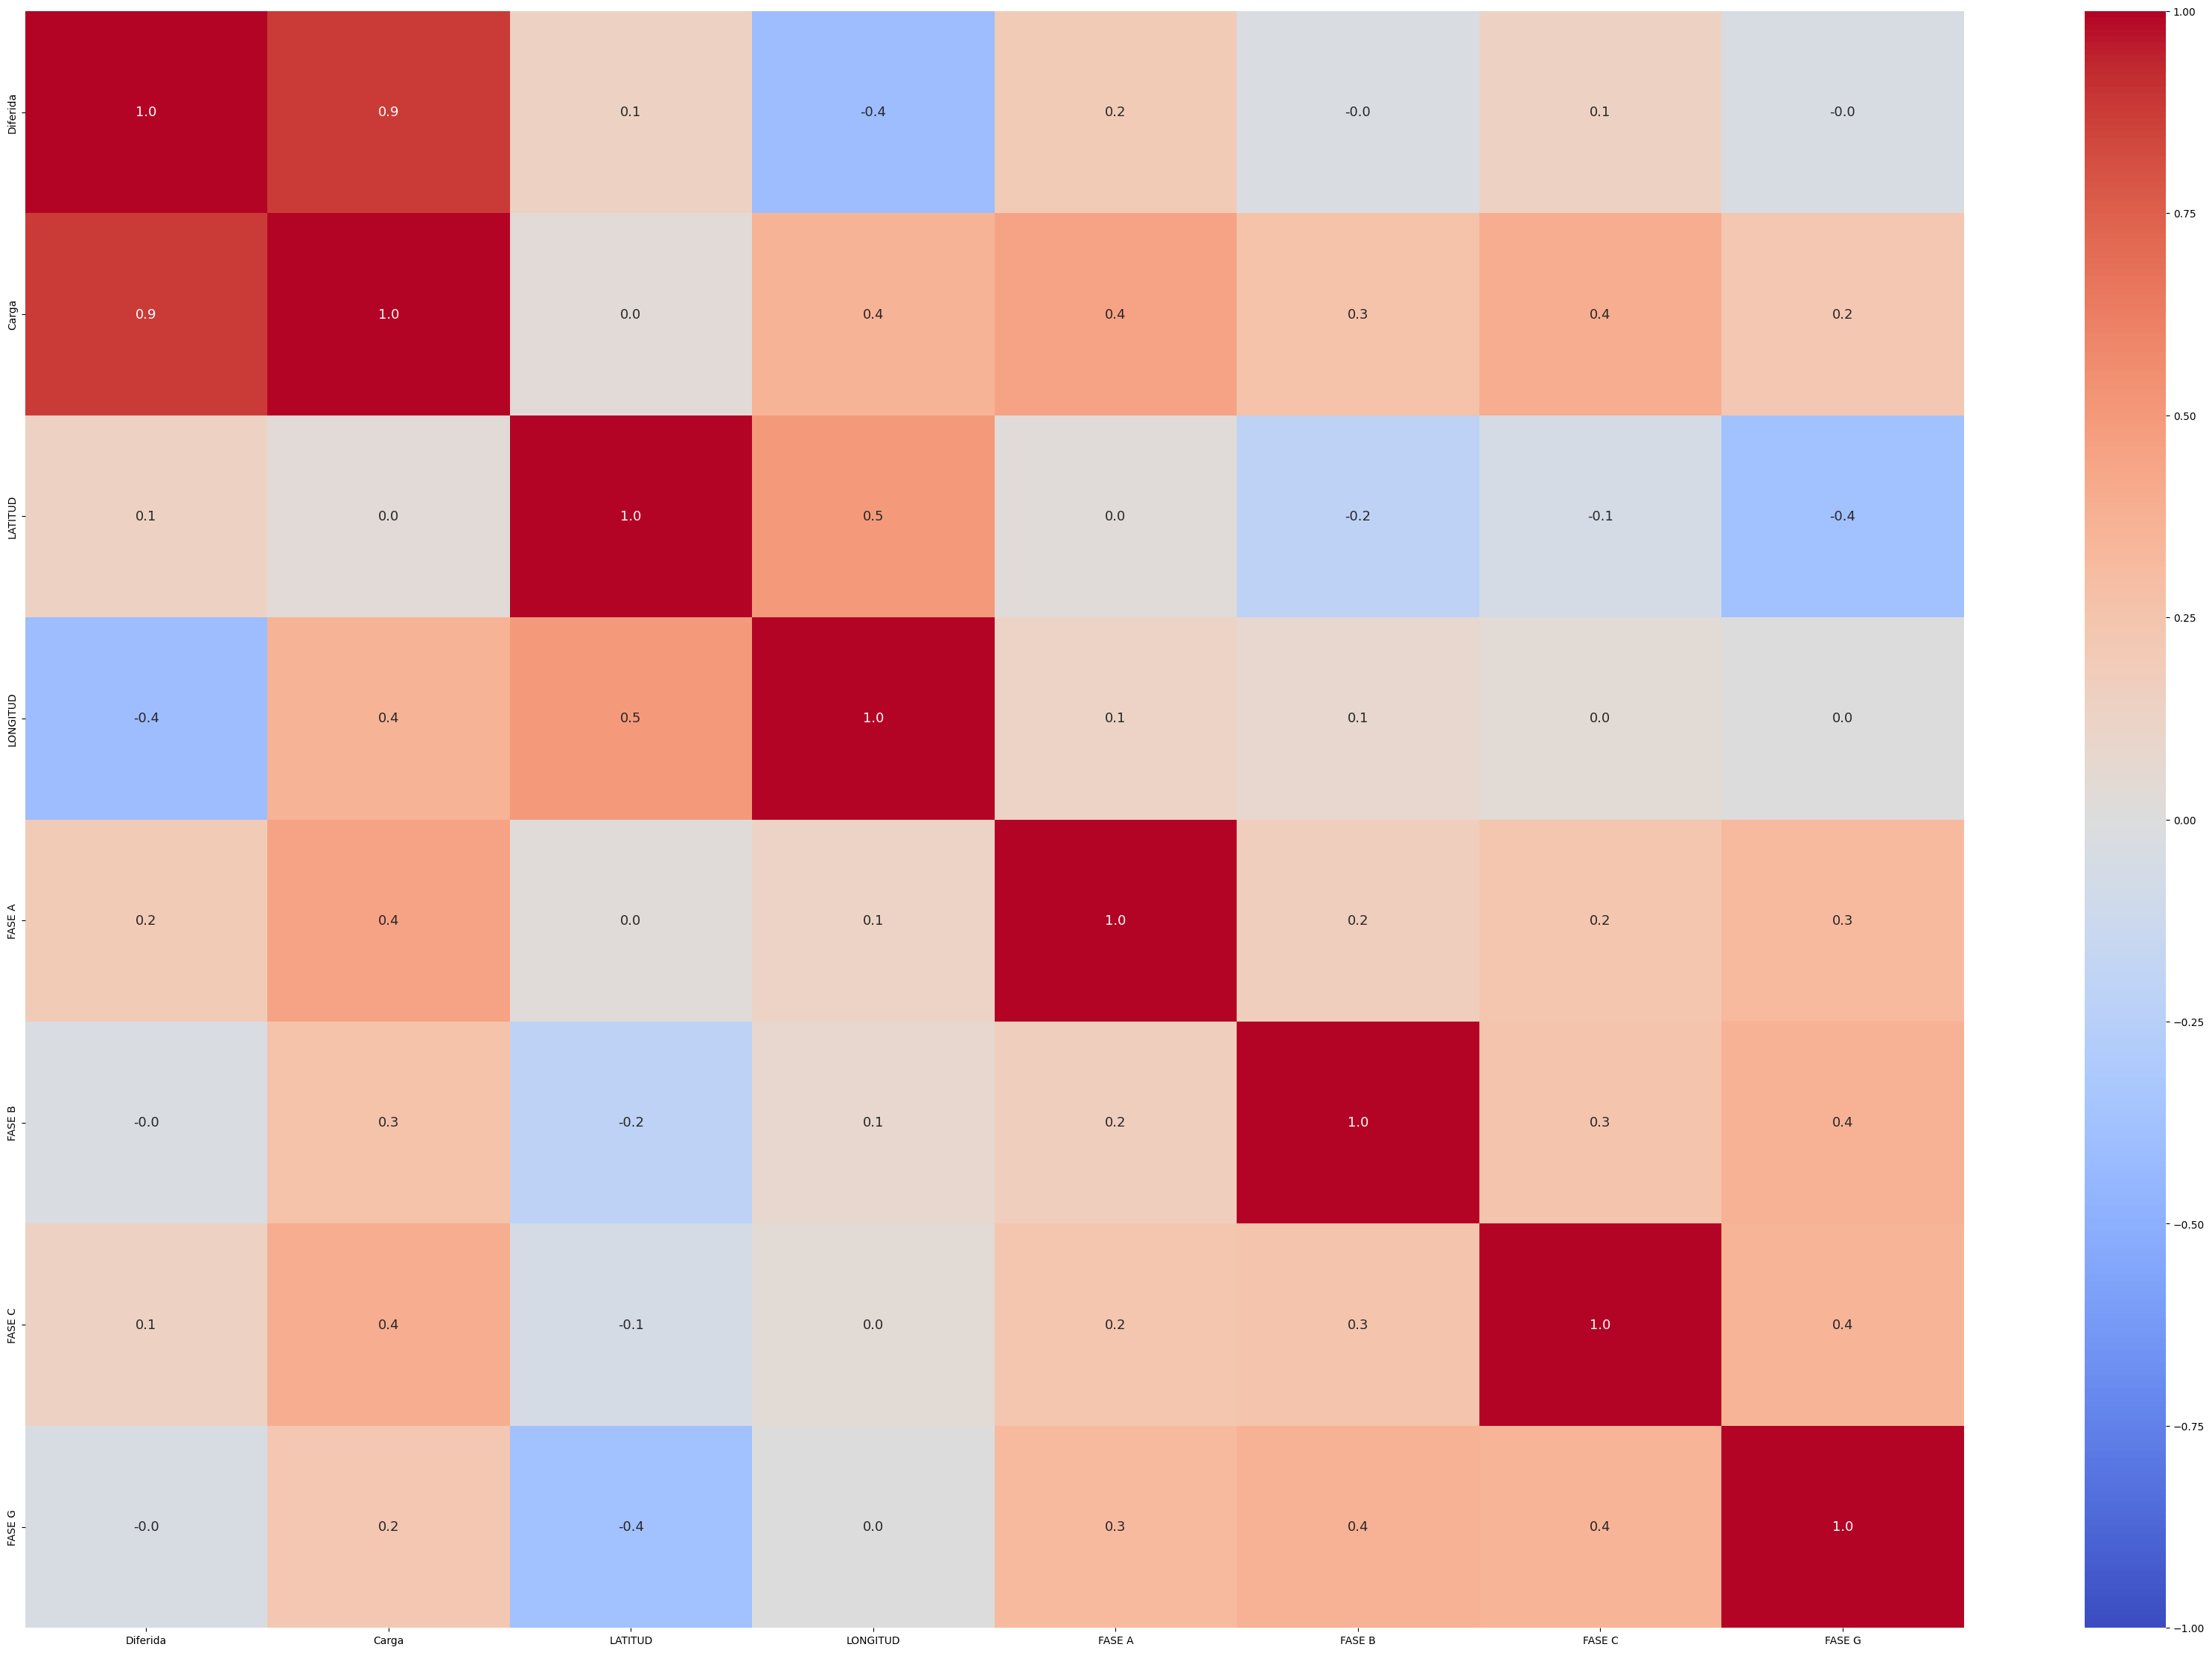

In [28]:
fig, ax = plt.subplots(figsize = (42, 28.2))
mapa_calor = sns.heatmap(datos.corr(numeric_only=True),
                         annot = True,
                         cmap = 'coolwarm',
                         vmin = -1.0,
                         vmax = 1.0,
                         fmt = ".1f",
                         annot_kws = {'size':13}
                         )
plt.show()

#### Usando SciPy

Permite obtener el p-valor de la correlación para saber si es significativa o no.

In [29]:
from scipy import stats


1. Debemos saber si las variables están normalmente distribuidas o no. Para esto, haremos el test de normalidad de Shapiro-Wilk (ver https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html), donde se hipotetiza ($H_0$) que los datos siguen una distribución normal:

In [31]:
stat, p = stats.shapiro(datos['Diferida'])
if (p < 0.05):
  print(f"Los datos de la Nota_definitiva NO provienen de una distribución normal (p-valor = {p:.3f}). ")
else:
  print(f"Los datos de la Nota_definitiva SI provienen de una distribución normal (p-valor = {p:.3f}). ")

Los datos de la Nota_definitiva NO provienen de una distribución normal (p-valor = 0.000). 


In [32]:
stat, p = stats.shapiro(datos['Carga'])
if (p < 0.05):
  print(f"Los datos de la Nota_definitiva NO provienen de una distribución normal (p-valor = {p:.3f}). ")
else:
  print(f"Los datos de la Nota_definitiva SI provienen de una distribución normal (p-valor = {p:.3f}). ")

Los datos de la Nota_definitiva SI provienen de una distribución normal (p-valor = nan). 


In [33]:
stat, p = stats.shapiro(datos['FASE A'])
if (p < 0.05):
  print(f"Los datos de la Nota_definitiva NO provienen de una distribución normal (p-valor = {p:.3f}). ")
else:
  print(f"Los datos de la Nota_definitiva SI provienen de una distribución normal (p-valor = {p:.3f}). ")

Los datos de la Nota_definitiva NO provienen de una distribución normal (p-valor = 0.000). 


In [34]:
stat, p = stats.shapiro(datos['FASE B'])
if (p < 0.05):
  print(f"Los datos de la Nota_definitiva NO provienen de una distribución normal (p-valor = {p:.3f}). ")
else:
  print(f"Los datos de la Nota_definitiva SI provienen de una distribución normal (p-valor = {p:.3f}). ")

Los datos de la Nota_definitiva NO provienen de una distribución normal (p-valor = 0.000). 


In [35]:
stat, p = stats.shapiro(datos['FASE C'])
if (p < 0.05):
  print(f"Los datos de la Nota_definitiva NO provienen de una distribución normal (p-valor = {p:.3f}). ")
else:
  print(f"Los datos de la Nota_definitiva SI provienen de una distribución normal (p-valor = {p:.3f}). ")

Los datos de la Nota_definitiva NO provienen de una distribución normal (p-valor = 0.000). 


In [36]:
stat, p = stats.shapiro(datos['FASE G'])
if (p < 0.05):
  print(f"Los datos de la Nota_definitiva NO provienen de una distribución normal (p-valor = {p:.3f}). ")
else:
  print(f"Los datos de la Nota_definitiva SI provienen de una distribución normal (p-valor = {p:.3f}). ")

Los datos de la Nota_definitiva SI provienen de una distribución normal (p-valor = nan). 


2. En este caso, como la variable Diferida no está distribuida normalmente, haremos el análisis de correlaciones usando el coeficiente de correlación de Spearman (no paramétrico). En el análisis de correlaciones se hipotetiza ($H_0$) que NO hay correlación entre las variables:

In [ ]:
for factor in datos.columns:
  if factor not in ['Estudiante', 'Nota_definitiva', 'Sexo', 'Estrato_socioeconómico',
                    'Estado_laboral', 'Colegio', 'Procedencia', 'Estudios_previos']:
    cols_completos = ['Nota_definitiva', factor] # Se excluyen las variables categóricas, la nota y la misma variable (factor)
    datos_completos = datos.dropna(subset=cols_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
    coef, p = stats.spearmanr(datos_completos[factor], datos_completos['Nota_definitiva']) #Coeficiente de correlación de Spearman
    if p < 0.05:
      print(f'La Nota_definitiva está correlacionada de forma significativa con {factor} (coef = {coef:.2f}; p-valor = {p:.3f})')
    #else:
    #  print(f'Las muestras no están correlacionadas de forma significativa (p = {p:.2f})')

La Nota_definitiva está correlacionada de forma significativa con Horas_laborales (coef = -0.33; p-valor = 0.020)
La Nota_definitiva está correlacionada de forma significativa con Promedio_Académico (coef = 0.26; p-valor = 0.001)
La Nota_definitiva está correlacionada de forma significativa con Pos_Valoración_de_la_tarea (coef = 0.20; p-valor = 0.024)
La Nota_definitiva está correlacionada de forma significativa con Pos_Control_del_Aprendizaje (coef = 0.19; p-valor = 0.028)
La Nota_definitiva está correlacionada de forma significativa con Pos_Expectativas_de_autoeficacia_en_el_rendimiento (coef = 0.45; p-valor = 0.000)
La Nota_definitiva está correlacionada de forma significativa con Pos_Expectativas_de_autoeficacia_en_el_aprendizaje (coef = 0.25; p-valor = 0.004)
La Nota_definitiva está correlacionada de forma significativa con Pos_Ansiedad (coef = -0.18; p-valor = 0.037)
La Nota_definitiva está correlacionada de forma significativa con Pos_Pensamiento_Crítico (coef = 0.18; p-valor = 

3. Ahora, como las demás variables están distribuidas normalmente, haremos el análisis de correlaciones usando el coeficiente de correlación de Pearson (Paramétrico):

In [ ]:
for factor in datos.columns:
  if factor not in ['Estudiante', 'Sexo', 'Estrato_socioeconómico',
                    'Estado_laboral', 'Colegio', 'Procedencia', 'Estudios_previos', 'Promedio_Académico']:
    cols_completos = ['Promedio_Académico', factor] # Se excluyen las variables categóricas, la nota y la misma variable (factor)
    datos_completos = datos.dropna(subset=cols_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
    coef, p = stats.pearsonr(datos_completos[factor], datos_completos['Promedio_Académico']) #Coeficiente de correlación de Spearman
    if p < 0.05:
      print(f'La Nota_definitiva está correlacionada de forma significativa con {factor} (coef = {coef:.2f}; p-valor = {p:.3f})')
    #else:
    #  print(f'Las muestras no están correlacionadas de forma significativa (p = {p:.2f})')

La Nota_definitiva está correlacionada de forma significativa con Nota_definitiva (coef = 0.23; p-valor = 0.002)
La Nota_definitiva está correlacionada de forma significativa con Edad (coef = -0.16; p-valor = 0.038)
La Nota_definitiva está correlacionada de forma significativa con Asignaturas_inscritas (coef = 0.23; p-valor = 0.001)
La Nota_definitiva está correlacionada de forma significativa con Puntaje_admisión_UNAL (coef = 0.22; p-valor = 0.005)
La Nota_definitiva está correlacionada de forma significativa con Pre_Control_del_Aprendizaje (coef = 0.15; p-valor = 0.039)
La Nota_definitiva está correlacionada de forma significativa con Pre_Ansiedad (coef = -0.17; p-valor = 0.017)
La Nota_definitiva está correlacionada de forma significativa con Pre_Pensamiento_Crítico (coef = 0.25; p-valor = 0.001)
La Nota_definitiva está correlacionada de forma significativa con Pre_Metacognición_cambio_método_de_estudio (coef = 0.14; p-valor = 0.050)
La Nota_definitiva está correlacionada de forma s

In [ ]:
for factor in datos.columns:
  if factor not in ['Estudiante', 'Sexo', 'Estrato_socioeconómico',
                    'Estado_laboral', 'Colegio', 'Procedencia', 'Estudios_previos','Horas_trabajo_extraclase']:
    cols_completos = ['Horas_trabajo_extraclase', factor] # Se excluyen las variables categóricas, la nota y la misma variable (factor)
    datos_completos = datos.dropna(subset=cols_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
    coef, p = stats.pearsonr(datos_completos[factor], datos_completos['Horas_trabajo_extraclase']) #Coeficiente de correlación de Spearman
    if p < 0.05:
      print(f'La Nota_definitiva está correlacionada de forma significativa con {factor} (coef = {coef:.2f}; p-valor = {p:.3f})')
    #else:
    #  print(f'Las muestras no están correlacionadas de forma significativa (p = {p:.2f})')

La Nota_definitiva está correlacionada de forma significativa con Nota_definitiva (coef = 0.19; p-valor = 0.011)
La Nota_definitiva está correlacionada de forma significativa con Pre_Expectativas_de_autoeficacia_en_el_rendimiento (coef = 0.15; p-valor = 0.041)
La Nota_definitiva está correlacionada de forma significativa con Pre_Memorización (coef = 0.17; p-valor = 0.020)
La Nota_definitiva está correlacionada de forma significativa con Pre_Pensamiento_Crítico (coef = 0.15; p-valor = 0.034)
La Nota_definitiva está correlacionada de forma significativa con Pre_Metacognición_Planeación (coef = 0.17; p-valor = 0.018)
La Nota_definitiva está correlacionada de forma significativa con Pre_Administración_tiempo_de_estudio (coef = 0.29; p-valor = 0.000)
La Nota_definitiva está correlacionada de forma significativa con Pre_Lugar_de_estudio (coef = 0.17; p-valor = 0.023)
La Nota_definitiva está correlacionada de forma significativa con Pre_Esfuerzo (coef = 0.22; p-valor = 0.002)
La Nota_definiti

In [ ]:
for factor in datos.columns:
  if factor not in ['Estudiante', 'Sexo', 'Estrato_socioeconómico',
                    'Estado_laboral', 'Colegio', 'Procedencia', 'Estudios_previos','Edad']:
    cols_completos = ['Edad', factor] # Se excluyen las variables categóricas, la nota y la misma variable (factor)
    datos_completos = datos.dropna(subset=cols_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
    coef, p = stats.pearsonr(datos_completos[factor], datos_completos['Edad']) #Coeficiente de correlación de Spearman
    if p < 0.05:
      print(f'La Nota_definitiva está correlacionada de forma significativa con {factor} (coef = {coef:.2f}; p-valor = {p:.3f})')
    #else:
    #  print(f'Las muestras no están correlacionadas de forma significativa (p = {p:.2f})')

La Nota_definitiva está correlacionada de forma significativa con Promedio_Académico (coef = -0.16; p-valor = 0.038)


In [ ]:
for factor in datos.columns:
  if factor not in ['Estudiante', 'Sexo', 'Estrato_socioeconómico',
                    'Estado_laboral', 'Colegio', 'Procedencia', 'Estudios_previos','Horas_laborales']:
    cols_completos = ['Horas_laborales', factor] # Se excluyen las variables categóricas, la nota y la misma variable (factor)
    datos_completos = datos.dropna(subset=cols_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
    coef, p = stats.pearsonr(datos_completos[factor], datos_completos['Horas_laborales']) #Coeficiente de correlación de Spearman
    if p < 0.05:
      print(f'La Nota_definitiva está correlacionada de forma significativa con {factor} (coef = {coef:.2f}; p-valor = {p:.3f})')
    #else:
    #  print(f'Las muestras no están correlacionadas de forma significativa (p = {p:.2f})')

La Nota_definitiva está correlacionada de forma significativa con Nota_definitiva (coef = -0.31; p-valor = 0.029)
La Nota_definitiva está correlacionada de forma significativa con Asignaturas_inscritas (coef = -0.44; p-valor = 0.001)
La Nota_definitiva está correlacionada de forma significativa con Pre_Aprendizaje_por_pares (coef = -0.50; p-valor = 0.000)


De acuerdo a lo anterior, algunas de las correlaciones más notables son:


*   Nota_definitiva y Promedio_Académico
*   Nota_definitiva y Pos_Expectativas_de_autoeficacia_en_el_rendimiento
*   Promedio_Académico y Pre_Esfuerzo
*   Promedio_Académico y Pos_Metacognición_seguimiento
*   Horas_trabajo_extraclase y Pre_Administración_tiempo_de_estudio
*   Horas_laborales y Pre_Aprendizaje_por_pares
*   Horas_laborales y Asignaturas_inscritas

De estas, excluimos las "pos", ya que son una autopercepción porterior del estudiante y no es concluyente.








# 3. Análisis ANOVA de 1 factor (variable cuantitativa - variable categórica)

Un análisis de varianza (ANOVA) prueba la hipótesis de que las medias de dos o más poblaciones son iguales. Los ANOVA evalúan la importancia de uno o más factores al comparar las medias de la variable de respuesta en los diferentes niveles de los factores. La hipótesis nula establece que todas las medias de la población (medias de los niveles de los factores) son iguales mientras que la hipótesis alternativa establece que al menos una es diferente. Para ejecutar un ANOVA, debe tener una variable de respuesta continua y al menos un factor categórico con dos o más niveles. Tomado de: https://support.minitab.com/es-mx/minitab/18/help-and-how-to/modeling-statistics/anova/supporting-topics/basics/what-is-anova/

En Python se puede realizar este análisis de distintas maneras:

### Usando SciPy

In [ ]:
# Separamos los datos de acuerdo al factor
grupos = datos.groupby('Sexo')
masculino = datos.loc[grupos.groups['Masculino']]
femenino = datos.loc[grupos.groups['Femenino']]
print(masculino.head())


     Estudiante  Nota_definitiva       Sexo  Edad  Estrato_socioeconómico  \
0  Estudiante 1              3.5  Masculino  20.0                     3.0   
1  Estudiante 2              3.1  Masculino   NaN                     2.0   
2  Estudiante 3              3.3  Masculino  20.0                     3.0   
3  Estudiante 4              4.9  Masculino  20.0                     3.0   
5  Estudiante 6              0.0  Masculino  26.0                     3.0   

  Estado_laboral  Horas_laborales  Asignaturas_inscritas  \
0     No trabaja              NaN                    5.0   
1     No trabaja              NaN                    5.0   
2     No trabaja              NaN                    6.0   
3     No trabaja              NaN                    5.0   
5     No trabaja              NaN                    4.0   

   Horas_trabajo_extraclase  Colegio  ... Pos_Elaboración_de_ideas  \
0                      10.0  Público  ...                      4.2   
1                       2.0  Privado

In [ ]:
print(femenino.head())

       Estudiante  Nota_definitiva      Sexo  Edad  Estrato_socioeconómico  \
14  Estudiante 15              3.1  Femenino   NaN                     5.0   
23  Estudiante 24              3.4  Femenino  27.0                     3.0   
26  Estudiante 27              3.3  Femenino  20.0                     4.0   
41  Estudiante 42              4.3  Femenino  20.0                     4.0   
44  Estudiante 45              1.5  Femenino  20.0                     3.0   

   Estado_laboral  Horas_laborales  Asignaturas_inscritas  \
14     No trabaja              NaN                    4.0   
23     Sí trabaja             36.0                    5.0   
26     No trabaja              NaN                    5.0   
41     No trabaja              NaN                    5.0   
44     No trabaja              NaN                    4.0   

    Horas_trabajo_extraclase  Colegio  ... Pos_Elaboración_de_ideas  \
14                       8.0  Privado  ...                      NaN   
23                    

In [ ]:
datos_completos = ['Nota_definitiva', 'Sexo'] # Se seleccionan las vartiables de interés
datos_completos_male = masculino.dropna(subset=datos_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
datos_completos_female = femenino.dropna(subset=datos_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
# ANOVA de 1 factor
print(stats.f_oneway(datos_completos_male['Nota_definitiva'], datos_completos_female['Nota_definitiva']))

F_onewayResult(statistic=0.003495939455090516, pvalue=0.9529180769964505)


In [ ]:
datos_completos = ['Pre_Metas_intrínsecas', 'Sexo'] # Se seleccionan las vartiables de interés
datos_completos_male = masculino.dropna(subset=datos_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
datos_completos_female = femenino.dropna(subset=datos_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
# ANOVA de 1 factor
print(stats.f_oneway(datos_completos_male['Pre_Metas_intrínsecas'], datos_completos_female['Pre_Metas_intrínsecas']))

F_onewayResult(statistic=0.4321528669785268, pvalue=0.5117559421844966)


In [ ]:
datos_completos = ['Pre_Ansiedad', 'Sexo'] # Se seleccionan las vartiables de interés
datos_completos_male = masculino.dropna(subset=datos_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
datos_completos_female = femenino.dropna(subset=datos_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
# ANOVA de 1 factor
print(stats.f_oneway(datos_completos_male['Pre_Ansiedad'], datos_completos_female['Pre_Ansiedad']))

F_onewayResult(statistic=2.3382538838526403, pvalue=0.12794828727603155)


En este caso, los datos no aportan evidencia suficiente para rechazar la hipótesis nula, es decir, **NO hay evidencia significativa** que permita afirmar que las medias de la nota definitiva y los resultados pre para metas intrínsecas y ansiedad son distinta para hombres y para mujeres.




*   Ahora, realizamos lo mismo con la variable Estado_laboral


In [ ]:
# Separamos los datos de acuerdo al factor
grupos = datos.groupby('Estado_laboral')
no_trabaja = datos.loc[grupos.groups['No trabaja']]
si_trabaja = datos.loc[grupos.groups['Sí trabaja']]
print(no_trabaja.head())


     Estudiante  Nota_definitiva       Sexo  Edad  Estrato_socioeconómico  \
0  Estudiante 1              3.5  Masculino  20.0                     3.0   
1  Estudiante 2              3.1  Masculino   NaN                     2.0   
2  Estudiante 3              3.3  Masculino  20.0                     3.0   
3  Estudiante 4              4.9  Masculino  20.0                     3.0   
4  Estudiante 5              NaN  Masculino  22.0                     2.0   

  Estado_laboral  Horas_laborales  Asignaturas_inscritas  \
0     No trabaja              NaN                    5.0   
1     No trabaja              NaN                    5.0   
2     No trabaja              NaN                    6.0   
3     No trabaja              NaN                    5.0   
4     No trabaja              NaN                    6.0   

   Horas_trabajo_extraclase  Colegio  ... Pos_Elaboración_de_ideas  \
0                      10.0  Público  ...                      4.2   
1                       2.0  Privado

In [ ]:
datos_completos = ['Nota_definitiva', 'Estado_laboral'] # Se seleccionan las vartiables de interés
datos_completos_no_trab = no_trabaja.dropna(subset=datos_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
datos_completos_si_trab = si_trabaja.dropna(subset=datos_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
# ANOVA de 1 factor
print(stats.f_oneway(datos_completos_no_trab['Nota_definitiva'], datos_completos_si_trab['Nota_definitiva']))

F_onewayResult(statistic=3.5428930830841545, pvalue=0.06149981079159667)


In [ ]:
datos_completos = ['Horas_trabajo_extraclase', 'Estado_laboral'] # Se seleccionan las vartiables de interés
datos_completos_no_trab = no_trabaja.dropna(subset=datos_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
datos_completos_si_trab = si_trabaja.dropna(subset=datos_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
# ANOVA de 1 factor
print(stats.f_oneway(datos_completos_no_trab['Horas_trabajo_extraclase'], datos_completos_si_trab['Horas_trabajo_extraclase']))

F_onewayResult(statistic=0.25502757191981706, pvalue=0.6141332030288805)


In [ ]:
datos_completos = ['Asignaturas_inscritas', 'Estado_laboral'] # Se seleccionan las vartiables de interés
datos_completos_no_trab = no_trabaja.dropna(subset=datos_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
datos_completos_si_trab = si_trabaja.dropna(subset=datos_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
# ANOVA de 1 factor
print(stats.f_oneway(datos_completos_no_trab['Asignaturas_inscritas'], datos_completos_si_trab['Asignaturas_inscritas']))

F_onewayResult(statistic=1.1073193080768835, pvalue=0.29400186084244406)


In [ ]:
datos_completos = ['Pre_Aprendizaje_por_pares', 'Estado_laboral'] # Se seleccionan las vartiables de interés
datos_completos_no_trab = no_trabaja.dropna(subset=datos_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
datos_completos_si_trab = si_trabaja.dropna(subset=datos_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
# ANOVA de 1 factor
print(stats.f_oneway(datos_completos_no_trab['Pre_Aprendizaje_por_pares'], datos_completos_si_trab['Pre_Aprendizaje_por_pares']))

F_onewayResult(statistic=1.1703989321513708, pvalue=0.2807124027085324)


In [ ]:
datos_completos = ['Pre_Valoración_de_la_tarea', 'Estado_laboral'] # Se seleccionan las vartiables de interés
datos_completos_no_trab = no_trabaja.dropna(subset=datos_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
datos_completos_si_trab = si_trabaja.dropna(subset=datos_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
# ANOVA de 1 factor
print(stats.f_oneway(datos_completos_no_trab['Pre_Valoración_de_la_tarea'], datos_completos_si_trab['Pre_Valoración_de_la_tarea']))

F_onewayResult(statistic=0.693096212841109, pvalue=0.4061924877649502)


De este ejemplo, no encontramos una relación significativa de las variables anteriores respecto a la variable categórica estado laboral.


*   Finalmente, realizamos lo mismo con la variable categórica procedencia:



In [ ]:
# Separamos los datos de acuerdo al factor
grupos = datos.groupby('Procedencia')
Bog = datos.loc[grupos.groups['Bogotá']]
Fuera = datos.loc[grupos.groups['Fuera de Bogotá']]
print(Bog.head())

     Estudiante  Nota_definitiva       Sexo  Edad  Estrato_socioeconómico  \
0  Estudiante 1              3.5  Masculino  20.0                     3.0   
1  Estudiante 2              3.1  Masculino   NaN                     2.0   
2  Estudiante 3              3.3  Masculino  20.0                     3.0   
3  Estudiante 4              4.9  Masculino  20.0                     3.0   
4  Estudiante 5              NaN  Masculino  22.0                     2.0   

  Estado_laboral  Horas_laborales  Asignaturas_inscritas  \
0     No trabaja              NaN                    5.0   
1     No trabaja              NaN                    5.0   
2     No trabaja              NaN                    6.0   
3     No trabaja              NaN                    5.0   
4     No trabaja              NaN                    6.0   

   Horas_trabajo_extraclase  Colegio  ... Pos_Elaboración_de_ideas  \
0                      10.0  Público  ...                      4.2   
1                       2.0  Privado

In [ ]:
datos_completos = ['Nota_definitiva', 'Procedencia'] # Se seleccionan las vartiables de interés
datos_completos_bog = Bog.dropna(subset=datos_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
datos_completos_fuera = Fuera.dropna(subset=datos_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
# ANOVA de 1 factor
print(stats.f_oneway(datos_completos_bog['Nota_definitiva'], datos_completos_fuera['Nota_definitiva']))

F_onewayResult(statistic=1.0428915525469433, pvalue=0.3085925164154986)


In [ ]:
datos_completos = ['Horas_laborales', 'Procedencia'] # Se seleccionan las vartiables de interés
datos_completos_bog = Bog.dropna(subset=datos_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
datos_completos_fuera = Fuera.dropna(subset=datos_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
# ANOVA de 1 factor
print(stats.f_oneway(datos_completos_bog['Horas_laborales'], datos_completos_fuera['Horas_laborales']))

F_onewayResult(statistic=1.003371657273457, pvalue=0.3208827968857221)


De este último ejemplo, tampoco se obtuvo un p valor significativo respecto a las variables.

### Usando statsmodels

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
for factor in ['Sexo', 'Estrato_socioeconómico', 'Estado_laboral', 'Asignaturas_inscritas',
       'Colegio ', 'Procedencia', 'Estudios_previos']:
  model = smf.ols(formula = f'Nota_definitiva ~ C({factor})', data=datos).fit()
  anova_result = sm.stats.anova_lm(model, typ=1)
  p_value = anova_result.iloc[0]['PR(>F)']
  if p_value < 0.05:
    print(f'La nota definitiva SI tiene una relación significativa con la variable {factor} (p-valor={p_value:.3f})')
    print(anova_result)
  else:
    print(f'La nota definitiva NO tiene una relación significativa con la variable {factor} (p-valor={p_value:.3f})')


La nota definitiva NO tiene una relación significativa con la variable Sexo (p-valor=0.953)
La nota definitiva NO tiene una relación significativa con la variable Estrato_socioeconómico (p-valor=0.632)
La nota definitiva NO tiene una relación significativa con la variable Estado_laboral (p-valor=0.061)
La nota definitiva NO tiene una relación significativa con la variable Asignaturas_inscritas (p-valor=0.098)
La nota definitiva NO tiene una relación significativa con la variable Colegio  (p-valor=0.089)
La nota definitiva NO tiene una relación significativa con la variable Procedencia (p-valor=0.309)
La nota definitiva NO tiene una relación significativa con la variable Estudios_previos (p-valor=0.421)


Nótese que el resultado del análisis con la variable Sexo, coincide con el resultado anterior hallado con SciPy.

# 3. Análisis t-test

## **3.1. Teoría sobre la diferencia en las medias poblacionales de dos grupos relacionados**

 **Prueba t de dos muestras relacionadas (emparejadas)**: En el caso en que las muestras sean del mismo grupo en instantes distintos se debe aplican una variación de la prueba t para grupos relacionados. Esta prueba también se conoce como prueba t de muestras emparejadas. Es una prueba paramétrica que compara las medias de dos grupos relacionados para determinar si hay evidencia estadística de que las medias asociadas son significativamente diferentes.

_MSLQ: Pre - post test_

Se desea conocer el efecto que tuvo la intervención realizada en el curso sobre la motivación por aprender de los estudiantes. La motivación se puede cuantificar utilizando un instrumento de autoinforme en una escala ordinal de 1 (mínimo) a 7 (máximo) (como el conocido [MSLQ](https://upcommons.upc.edu/handle/2117/107554)). Se diseña un experimento con un único grupo de estudiantes de Estructuras de Datos, donde se les pide que diligencien el cuestionario de autoinforme para medir su motivación en dos momentos distintos:

1. Antes de poner en marcha la intervención (pre-test).
2. Al final del experimento, después de la intervención (3 meses) (post-test).

Se desea conocer si hubo alguna diferencia significativa en la motivación de los estudiantes gracias a la intervención que se hizo.
* **Nivel de confianza: $95\%$ (significancia: $5\%$)**.

1. Hallamos la lista de variables del MSLQ:

In [ ]:
mslq_vars = [mslq_var[4:] for mslq_var in datos.columns if 'Pre' in mslq_var]
mslq_vars

['Metas_intrínsecas',
 'Metas_extrínsecas',
 'Valoración_de_la_tarea',
 'Control_del_Aprendizaje',
 'Expectativas_de_autoeficacia_en_el_rendimiento',
 'Expectativas_de_autoeficacia_en_el_aprendizaje',
 'Ansiedad',
 'Memorización',
 'Elaboración_de_ideas',
 'Organización_de_ideas',
 'Pensamiento_Crítico',
 'Metacognición_Planeación',
 'Metacognición_cambio_método_de_estudio',
 'Metacognición_seguimiento',
 'Administración_tiempo_de_estudio',
 'Lugar_de_estudio',
 'Esfuerzo',
 'Aprendizaje_por_pares']

2. Planeamos las hipótesis nula y alternativa:

**Hipótesis**:

* Hipótesis nula $H_0: \mu_{post} = \mu_{pre}$ ($\mu_{post} - \mu_{pre} = 0$)
* Hipótesis alternativa $H_a: \mu_{post} \neq \mu_{pre}$ ($\mu_{post} - \mu_{pre} \neq 0$)


3. Realizamos la prueba de hipótesis para cada par (pretest, postest) de las variables del MSLQ.

**Usando `SciPy`**:

La función **`ttest_rel`** se encarga de realizar el test estadístico para dos muestras emparejadas. Retorna el estadístico *score* y el *p-valor*.

> **Ver la documentación oficial:**
  * [scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html)

In [ ]:
for var in mslq_vars:
  test, pvalor = stats.ttest_rel(datos['Pre_'+ var], datos['Pos_' + var], nan_policy='omit') # Se omiten los valores faltantes
  if pvalor < 0.05:
    print(f'Existe una diferencia significativa entre el pre-test y pos-test para la variable {var} (test = {test:.2f}; p-valor = {pvalor:.3f})')

Existe una diferencia significativa entre el pre-test y pos-test para la variable Metas_extrínsecas (test = 2.54; p-valor = 0.012)
Existe una diferencia significativa entre el pre-test y pos-test para la variable Control_del_Aprendizaje (test = 2.96; p-valor = 0.004)
Existe una diferencia significativa entre el pre-test y pos-test para la variable Expectativas_de_autoeficacia_en_el_rendimiento (test = 6.91; p-valor = 0.000)
Existe una diferencia significativa entre el pre-test y pos-test para la variable Expectativas_de_autoeficacia_en_el_aprendizaje (test = 3.37; p-valor = 0.001)
Existe una diferencia significativa entre el pre-test y pos-test para la variable Organización_de_ideas (test = -3.36; p-valor = 0.001)
Existe una diferencia significativa entre el pre-test y pos-test para la variable Metacognición_Planeación (test = 4.81; p-valor = 0.000)
Existe una diferencia significativa entre el pre-test y pos-test para la variable Metacognición_seguimiento (test = 2.82; p-valor = 0.006)

En los casos en que el *p-valor* no es menor al nivel de significancia ($5\%$), **NO** podemos rechazar la hipótesis nula. Esto significa que aunque la media en las variables del MSLQ de los estudiantes en el post-test sea diferente (mayor o menor) a la media de la motivación en el pre-test, esta diferencia no es significativa con un nivel de confianza del $95\%$.

In [ ]:
datos['Pre_Metacognición_Planeación'].sum()

823.75

In [ ]:
datos['Pos_Metacognición_Planeación'].sum()

609.25

In [ ]:
datos['Pre_Expectativas_de_autoeficacia_en_el_rendimiento'].sum()

1061.5

In [ ]:
datos['Pos_Expectativas_de_autoeficacia_en_el_rendimiento'].sum()

700.75

In [ ]:
datos['Pre_Expectativas_de_autoeficacia_en_el_aprendizaje'].sum()

1056.25

In [ ]:
datos['Pos_Expectativas_de_autoeficacia_en_el_aprendizaje'].sum()

744.0

Como podemos ver, los valores presentan cambios en sus valores totales, pues observamos una notable disminución en los p-valor más representativos. Esto puede deberse a varios factores, algunos de ellos son: disminución respecto a la respuesta en los pos test, respestas más acertadas de acuerdo al proceso realizado en la asignatura y respuestas mas aterrizadas de acuerdo a la nota obtenida.

# 5. Análisis de tamaño de efecto


Se realiza el análisis de **tamaño de efecto (*effect size*)** para las relaciones significativas identificadas con el ANOVA y para las diferencias significativas halladas con la prueba t-test de muestras relacionadas:

Cuando se quiere calcular el tamaño de efecto sobre una diferencia entre medias se utiliza el método conocido como **Cohen-d**. Ver: https://machinelearningmastery.com/effect-size-measures-in-python/

Nota: ya que no se identificaron relaciones significativas con los análisis realizados en las pruebas Anova, se procede a realizar el análisis de tamaño de efecto con la prueba t-test:

In [ ]:
import pandas as pd

In [ ]:
mean_1 = datos.Pre_Metacognición_Planeación.mean()
mean_2 = datos.Pos_Metacognición_Planeación.mean()
n1 = len(datos.Pre_Metacognición_Planeación)
n2 = len(datos.Pos_Metacognición_Planeación)
s1 = np.var(datos.Pre_Metacognición_Planeación, ddof = 1)
s2 = np.var(datos.Pos_Metacognición_Planeación, ddof = 1)
s = np.sqrt( ((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 -2))
#Calcular Cohens d
cohens = round(abs((mean_1 - mean_2)/ s), 2)
print("cohens d es", cohens)

cohens d es 0.51


Lo cual es un tamaño de efecto mediano. Es decir representa un cambio mediano en la población.

In [ ]:
mean_1 = datos.Pre_Expectativas_de_autoeficacia_en_el_rendimiento.mean()
mean_2 = datos.Pos_Expectativas_de_autoeficacia_en_el_rendimiento.mean()
n1 = len(datos.Pre_Expectativas_de_autoeficacia_en_el_rendimiento)
n2 = len(datos.Pos_Expectativas_de_autoeficacia_en_el_rendimiento)
s1 = np.var(datos.Pre_Expectativas_de_autoeficacia_en_el_rendimiento, ddof = 1)
s2 = np.var(datos.Pos_Expectativas_de_autoeficacia_en_el_rendimiento, ddof = 1)
s = np.sqrt( ((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 -2))
#Calcular Cohens d
cohens = round(abs((mean_1 - mean_2)/ s), 2)
print("cohens d es", cohens)

cohens d es 0.77


Lo cual es un tamaño de efecto mediano. Es decir representa un cambio mediano en la población, sin embargo, son las variables que más se acercan a un cambio grande de acuerdo a su tamaño de efecto a partir de lo encontrado en el t-test.

In [ ]:
mean_1 = datos.Pre_Expectativas_de_autoeficacia_en_el_aprendizaje.mean()
mean_2 = datos.Pos_Expectativas_de_autoeficacia_en_el_aprendizaje.mean()
n1 = len(datos.Pre_Expectativas_de_autoeficacia_en_el_aprendizaje)
n2 = len(datos.Pos_Expectativas_de_autoeficacia_en_el_aprendizaje)
s1 = np.var(datos.Pre_Expectativas_de_autoeficacia_en_el_aprendizaje, ddof = 1)
s2 = np.var(datos.Pos_Expectativas_de_autoeficacia_en_el_aprendizaje, ddof = 1)
s = np.sqrt( ((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 -2))
#Calcular Cohens d
cohens = round(abs((mean_1 - mean_2)/ s), 2)
print("cohens d es", cohens)

cohens d es 0.28


Lo cual es un tamaño de efecto pequeño. Es decir representa un cambio pequeño en la población.

In [ ]:
mean_1 = datos.Pre_Organización_de_ideas.mean()
mean_2 = datos.Pos_Organización_de_ideas.mean()
n1 = len(datos.Pre_Organización_de_ideas)
n2 = len(datos.Pos_Organización_de_ideas)
s1 = np.var(datos.Pre_Organización_de_ideas, ddof = 1)
s2 = np.var(datos.Pos_Organización_de_ideas, ddof = 1)
s = np.sqrt( ((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 -2))
#Calcular Cohens d
cohens = round(abs((mean_1 - mean_2)/ s), 2)
print("cohens d es", cohens)

cohens d es 0.18


Lo cual es un tamaño de efecto pequeño. Es decir representa un cambio pequeño en la población.

# 6. Análisis de regresión - OPCIONAL


#### Usando SciPy

Regresión lineal simple con SciPy:

pend,  interc, corr, p_valor, error_std = stats.linregress(x, y)

#### Usando statsmodels

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

Modelo usando el método mínimos cuadrados ordinarios (OLS)

`model = sm.OLS(y, x)`

Regresión con statsmodels formula

Regresión lineal con mínimos cuadrados ordinarios

`model = smf.ols(formula="V_D ~ V_I1 + V_I2 + V_I3",
                              data=datos).fit()`
Regresión logística

`model= smf.logit(formula="V_D ~ V_I1 + V_I2",                  
                              data=datos).fit()`


Ejecución del modelo de regresión

Calcula los parámetros del modelo

`model.fit()`                

Muestra los datos del modelo

`model.summary()`     

Hacer predicciones usando datos nuevos

`predictions = model.predict(x_nuevos)`


Regresión lineal múltiple

Con 2 variables independientes

`model = sm.OLS.from_formula("V_DEP ~ V_I1 + V_I2", data=datos)`

Con 3 variables independientes

`model = sm.OLS.from_formula("V_D ~ V_I1 + V_I2 + V_I3", data=datos)`



Regresión logística

`model = sm.GLM.from_formula( "V_DEP ~ V_IND1", family=sm.families.Binomial(),  data=da)`

Regresión logística con 2 variables independientes

`model = sm.GLM.from_formula( "V_DEP ~ V_IND1 + V_IND2", family = sm.families.Binomial(), data = da)`



#### Usando sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

`lm = LinearRegression()`

Calcular los parámetros del modelo
`lm.fit(x, y)`       Ajustar el modelo
`lm.coef_`           Coeficientes
`lm.intercept_`      Intercepto
`lm.score(x, y)`     Coeficiente de determinación

Hacer predicciones usando nuevos datos

`y_pred = lm.predict(X_nuevos)`
